## ANN Regression

In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

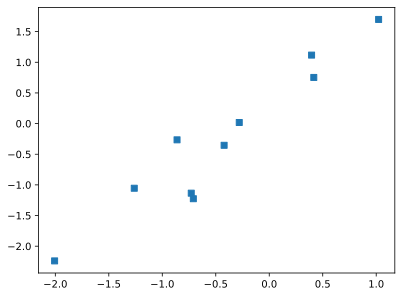

In [88]:
# create data

N = 10
x = torch.randn(N, 1)
y = x + torch.randn(N, 1)/2

plt.plot(x, y, 's')
plt.show()

In [89]:
# buid model

ANNReg = nn.Sequential(
    nn.Linear(1, 1), # input layer with 1 input i.e. 'x' and 1 output
    nn.ReLU(),       # activation function (non-linearity)
    nn.Linear(1, 1)  # output layer with 1 input i.e. output of previous layer and 1 output
)

ANNReg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [90]:
learningRate = 0.05

lossFunction = nn.MSELoss() # using MSE loss function

# optimizer -> flavour of GD to implement
optimizer = torch.optim.SGD(ANNReg.parameters(), lr=learningRate)

In [91]:
# train the model
epochs = 500
losses = torch.zeros(epochs)

for epoch in range(epochs):

    # forward pass
    yHat = ANNReg(x)
    # compute loss
    loss = lossFunction(yHat, y)
    losses[epoch] = loss

    # backprop
    optimizer.zero_grad() # re-initialize the gradients
    loss.backward()       # implements the backpropagation based on the computed loss
    optimizer.step()      # some housekeeping functions

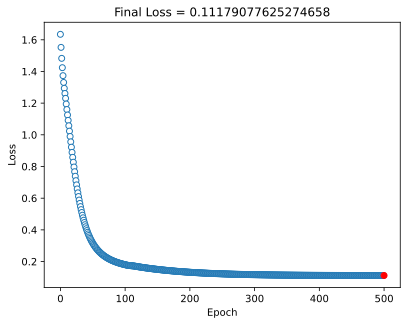

In [92]:
# final forward pass
predictions = ANNReg(x)
# final Loss (MSE)
testloss = (predictions - y).pow(2).mean() 

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.plot(epochs, testloss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final Loss = %s'%testloss.item())
plt.show()

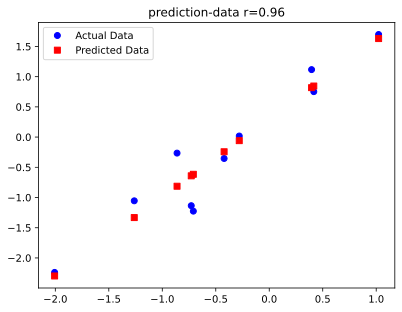

In [93]:
plt.plot(x, y, 'bo', label = 'Actual Data')
plt.plot(x, predictions.detach(), 'rs', label = 'Predicted Data')
plt.title(f'prediction-data r={np.corrcoef(y.T, predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()